In [21]:
import pandas as pd

# Load the dataset
data = pd.read_csv('AAPL.csv')

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Set frequency (daily data)
data = data.asfreq('D')

# Display the first few rows to verify
print(data.head())


                Open      High       Low     Close  Adj Close       Volume
Date                                                                      
1980-12-12  0.513393  0.515625  0.513393  0.513393   0.406782  117258400.0
1980-12-13       NaN       NaN       NaN       NaN        NaN          NaN
1980-12-14       NaN       NaN       NaN       NaN        NaN          NaN
1980-12-15  0.488839  0.488839  0.486607  0.486607   0.385558   43971200.0
1980-12-16  0.453125  0.453125  0.450893  0.450893   0.357260   26432000.0


In [11]:
# Forward fill missing values
data.ffill(inplace=True)

# Check for any remaining missing values
print(data.isnull().sum())


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


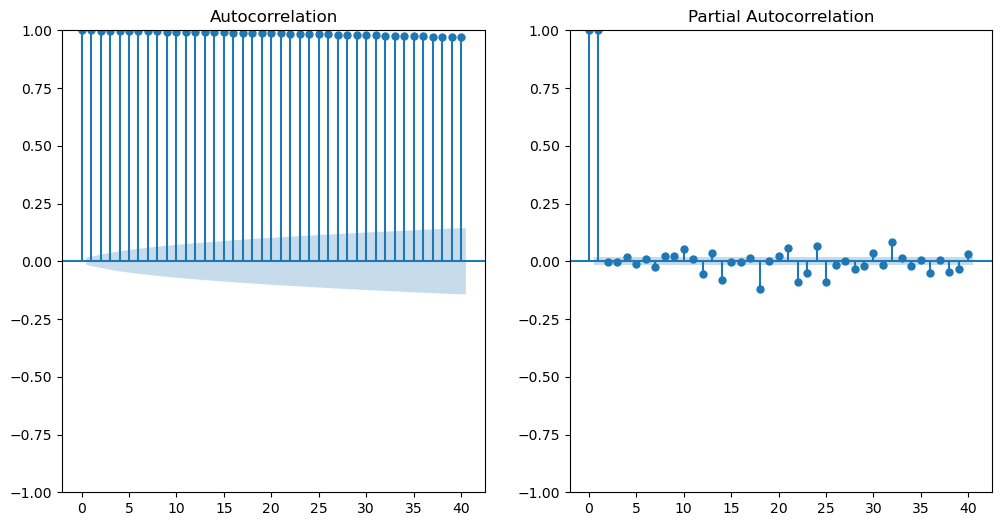

In [5]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF to help choose p, d, q
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(121)
plot_acf(data['Close'], lags=40, ax=plt.gca())

# PACF plot
plt.subplot(122)
plot_pacf(data['Close'], lags=40, ax=plt.gca())

plt.show()


In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model (p, d, q) values will depend on ACF and PACF results
model = ARIMA(data['Close'], order=(1, 1, 1))  # Example (1, 1, 1), adjust based on ACF/PACF

# Fit the ARIMA model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast for the next 10 days
forecast = model_fit.forecast(steps=10)
print(f"Forecasted values: {forecast}")


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                14356
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -21723.602
Date:                Fri, 08 Nov 2024   AIC                          43453.203
Time:                        00:43:31   BIC                          43475.919
Sample:                    12-12-1980   HQIC                         43460.756
                         - 04-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0485      0.011     -4.546      0.000      -0.069      -0.028
ma.L1         -0.0997      0.011     -9.264      0.000      -0.121      -0.079
sigma2         1.2077      0.001    807.431      0.0

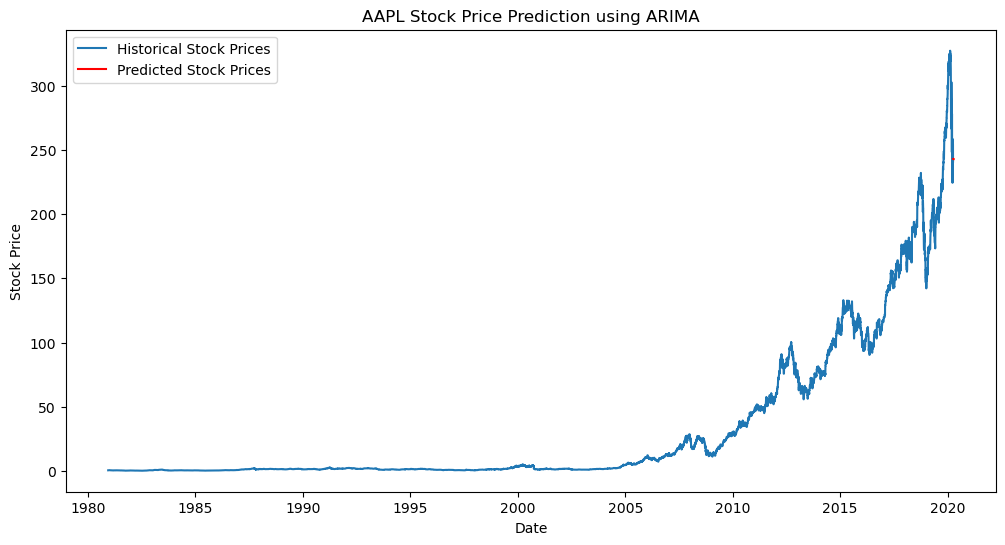

In [9]:
# Plotting the historical data and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Historical Stock Prices')
plt.plot(pd.date_range(data.index[-1], periods=11, freq='D')[1:], forecast, label='Predicted Stock Prices', color='red')
plt.title('AAPL Stock Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


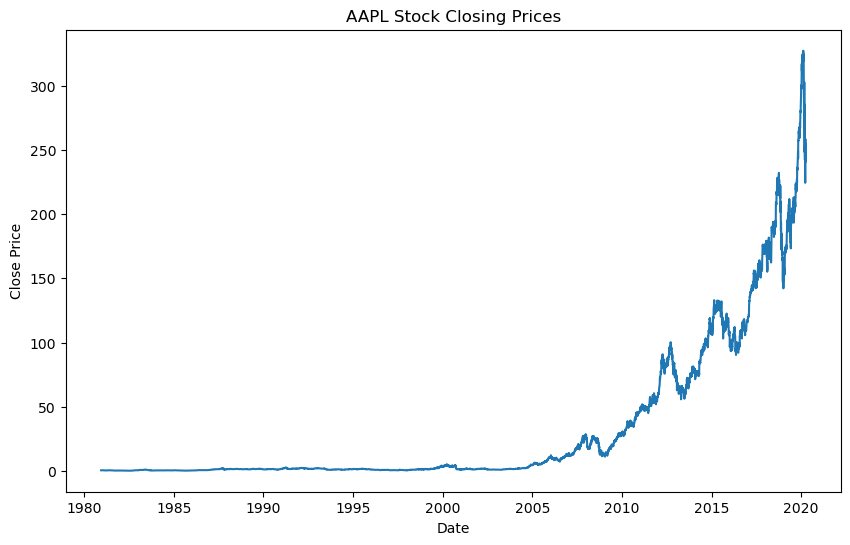

ADF Statistic: 1.893973846826085
p-value: 0.9985182618845982
The series is not stationary.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load your dataset (already done)
data = pd.read_csv('AAPL.csv')

# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the Date column as the index
data.set_index('Date', inplace=True)

# Sort the data by Date
data.sort_index(inplace=True)

# Plot the closing price to observe trends
plt.figure(figsize=(10,6))
plt.plot(data['Close'])
plt.title('AAPL Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Check for stationarity with the ADF test
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

# Apply the ADF test to the closing prices
adf_test(data['Close'])


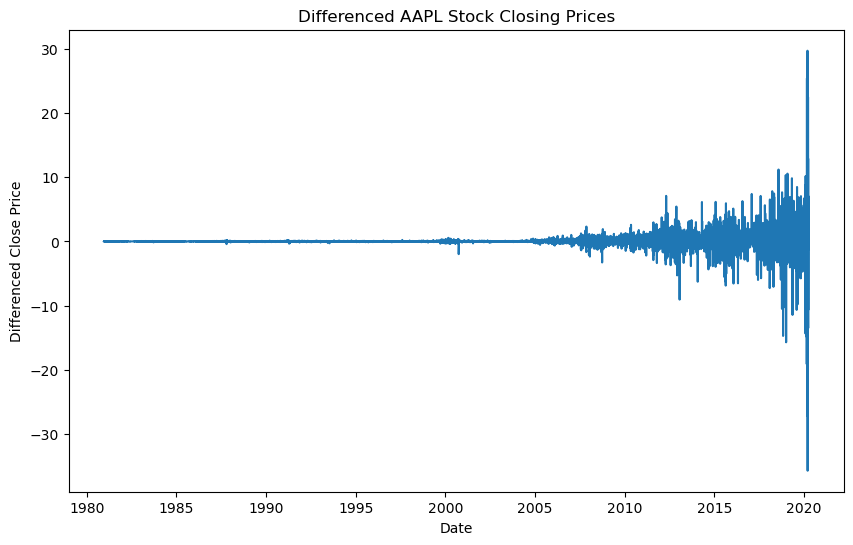

ADF Statistic: -15.355344806467908
p-value: 3.673144669580358e-28
The series is stationary.


In [15]:
# Difference the series to make it stationary
data['Close_diff'] = data['Close'].diff()

# Drop the NaN values that result from differencing
data.dropna(inplace=True)

# Plot the differenced series
plt.figure(figsize=(10,6))
plt.plot(data['Close_diff'])
plt.title('Differenced AAPL Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.show()

# Check for stationarity again with the ADF test
adf_test(data['Close_diff'])


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 9908
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -16780.444
Date:                Fri, 08 Nov 2024   AIC                          33566.888
Time:                        00:54:48   BIC                          33588.491
Sample:                             0   HQIC                         33574.204
                               - 9908                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1867      0.007    -25.229      0.000      -0.201      -0.172
ma.L1          0.0103      0.008      1.282      0.200      -0.005       0.026
sigma2         1.7327      0.003    499.479      0.0

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


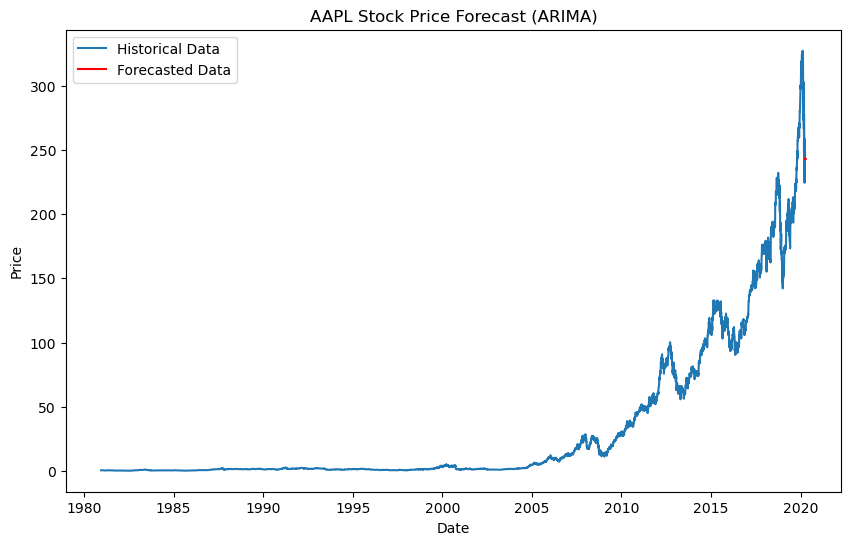

In [17]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (p=1, d=1, q=1)
model = ARIMA(data['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecast the next 10 days
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecasted values
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Historical Data')
plt.plot(pd.date_range(data.index[-1], periods=forecast_steps+1, freq='B')[1:], forecast, label='Forecasted Data', color='red')
plt.title('AAPL Stock Price Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
